# Step #1 Load the Data

In [56]:
# A tutorial for this file is available at www.relataly.com
# Tested with Python 3.8.8, Matplotlib 3.5, Scikit-learn 0.24.1, Seaborn 0.11.1, numpy 1.19.5

from cryptocmd import CmcScraper
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn import cluster, covariance, manifold
import requests
import json


#get a dictionary of the top 100 coin symbols and names from an API
def get_symbol_dict():
    url = 'https://api.coinmarketcap.com/data-api/v3/cryptocurrency/listing?start=1&limit=50&sortBy=market_cap&sortType=desc&convert=USD&cryptoType=all&tagType=all&audited=false'
    response = requests.get(url)
    data = json.loads(response.text)
    df = pd.DataFrame(data['data']['cryptoCurrencyList'])

    # exclude stable coins
    df = df[~df['symbol'].isin(['USDT', 'USDC', 'BUSD', 'DAI', 'TUSD', 'PAX', 'GUSD', 'HUSD', 'USDK', 'USDS', 'USDP', 'USDN', 'USDSB', 'USDX', 'USD++', 'BIDR', 'IDRT', 'VAI', 'BGBP'])]
    df = df[['symbol', 'name']]
    df = df.set_index('symbol')
    df = df.to_dict()
    df = df['name']
    return df

symbol_dict = get_symbol_dict()


# Download historic crypto prices via CmcScraper
def load_fresh_data_and_save_to_disc(symbol_dict, save_path):
    # Extract symbols and names from the symbol_dict
    symbols, names = np.array(sorted(symbol_dict.items())).T
    
    # Initialize an empty DataFrame for storing the prices
    df_crypto = pd.DataFrame()

    # Download and process the price data for each symbol
    for symbol in symbols:
        print(f"Fetching prices for {symbol}...")
        
        # Download the price data using CmcScraper
        scraper = CmcScraper(symbol)
        df_coin_prices = scraper.get_dataframe()

        # Process the price data and add it to df_crypto
        df = pd.DataFrame({
            f"{symbol}_Open": df_coin_prices["Open"],
            f"{symbol}_Close": df_coin_prices["Close"],
            f"{symbol}_Avg": (df_coin_prices["Close"] + df_coin_prices["Open"]) / 2,
            f"{symbol}_p": (df_coin_prices["Open"] - df_coin_prices["Close"]) / df_coin_prices["Open"]
        })
        df_crypto = pd.concat([df_crypto, df], axis=1)

    # Save the price data to a CSV file
    X_df_filtered = df_crypto.filter(like="_p")
    X_df_filtered.to_csv(save_path + "historical_crypto_prices.csv")

    return names, symbols, X_df_filtered
        

# If set to False the data will only be downloaded when you execute the code
# Set to True, if you want a fresh copy of the data.  
fetch_new_data = True 
save_path = '' # path where the price data will be stored in a csv file

# Fetch fresh data via the scraping package, or use data from the csv file on disk
if fetch_new_data == False:
    try:
        print('loading from disk')
        X_df_filtered = pd.read_csv(save_path + 'historical_crypto_prices.csv')
        if 'Unnamed: 0' in X_df_filtered.columns: 
            X_df_filtered = X_df_filtered.drop(['Unnamed: 0'], axis=1)
            symbols, names = np.array(sorted(symbol_dict.items())).T
        print(list(X_df_filtered.columns))
    except:
        print('no existing price data found - loading fresh data from coinmarketcap and saving them to disk')
        names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
        print(list(symbols))
else:
       print('loading fresh data from coinmarketcap and saving them to disk')
       names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
       print(list(symbols))

# Limit the price data to the last t days
t= 14 # in days
X_df_filtered = X_df_filtered[:t]
X_df_filtered.head()

loading fresh data from coinmarketcap and saving them to disk
Fetching prices for ADA...
Fetching prices for ALGO...
Fetching prices for APE...
Fetching prices for APT...
Fetching prices for ARB...
Fetching prices for ATOM...
Fetching prices for AVAX...
Fetching prices for BCH...
Fetching prices for BIT...
Fetching prices for BNB...
Fetching prices for BTC...
Fetching prices for CFX...
Fetching prices for CRO...
Fetching prices for DOGE...
Fetching prices for DOT...
Fetching prices for EGLD...
Fetching prices for EOS...
Fetching prices for ETC...
Fetching prices for ETH...
Fetching prices for FIL...
Fetching prices for FTM...
Fetching prices for GRT...
Fetching prices for HBAR...
Fetching prices for ICP...
Fetching prices for LDO...
Fetching prices for LEO...
Fetching prices for LINK...
Fetching prices for LTC...
Fetching prices for MANA...
Fetching prices for MATIC...
Fetching prices for NEAR...
Fetching prices for OKB...
Fetching prices for QNT...
Fetching prices for SHIB...
Fetching

,ADA_p,ALGO_p,APE_p,APT_p,ARB_p,ATOM_p,AVAX_p,BCH_p,BIT_p,BNB_p,...,STX_p,TON_p,TRX_p,UNI_p,VET_p,WBTC_p,XLM_p,XMR_p,XRP_p,XTZ_p
0,-0.065945,-0.008769,-0.040400,-0.011636,-0.047214,-0.035506,-0.013495,-0.006650,-0.007773,-0.007442,...,-0.035542,-0.008924,-0.009981,-0.030373,-0.019675,-0.005364,-0.055264,-0.012004,-0.072873,-0.012097
1,0.030157,0.050022,0.046482,0.062851,0.093422,0.042665,0.036794,0.036944,0.020473,0.054591,...,0.094742,0.012060,0.009928,0.025504,0.038021,0.030800,-0.006941,0.057917,-0.069402,0.055372
2,-0.012059,-0.020752,-0.025334,-0.023638,-0.048360,-0.019831,-0.014931,0.002180,-0.028229,-0.019376,...,-0.080915,-0.010760,-0.007724,-0.012787,-0.006568,-0.019460,-0.013237,-0.009370,-0.009315,-0.026741
3,0.022503,0.012765,0.021313,0.050274,0.037479,0.008450,0.006163,-0.010068,0.002746,-0.001096,...,0.085785,-0.000642,-0.004379,0.028883,0.004587,-0.000727,-0.021087,0.012120,-0.044154,0.017688
4,0.032190,0.047512,0.017891,0.078639,0.039916,0.042581,0.032859,0.038170,0.033470,0.022585,...,0.126168,0.039923,0.027878,0.056812,0.031978,0.031167,0.039719,-0.034156,0.042607,0.029672


# Step #2 Plotting Stock Charts

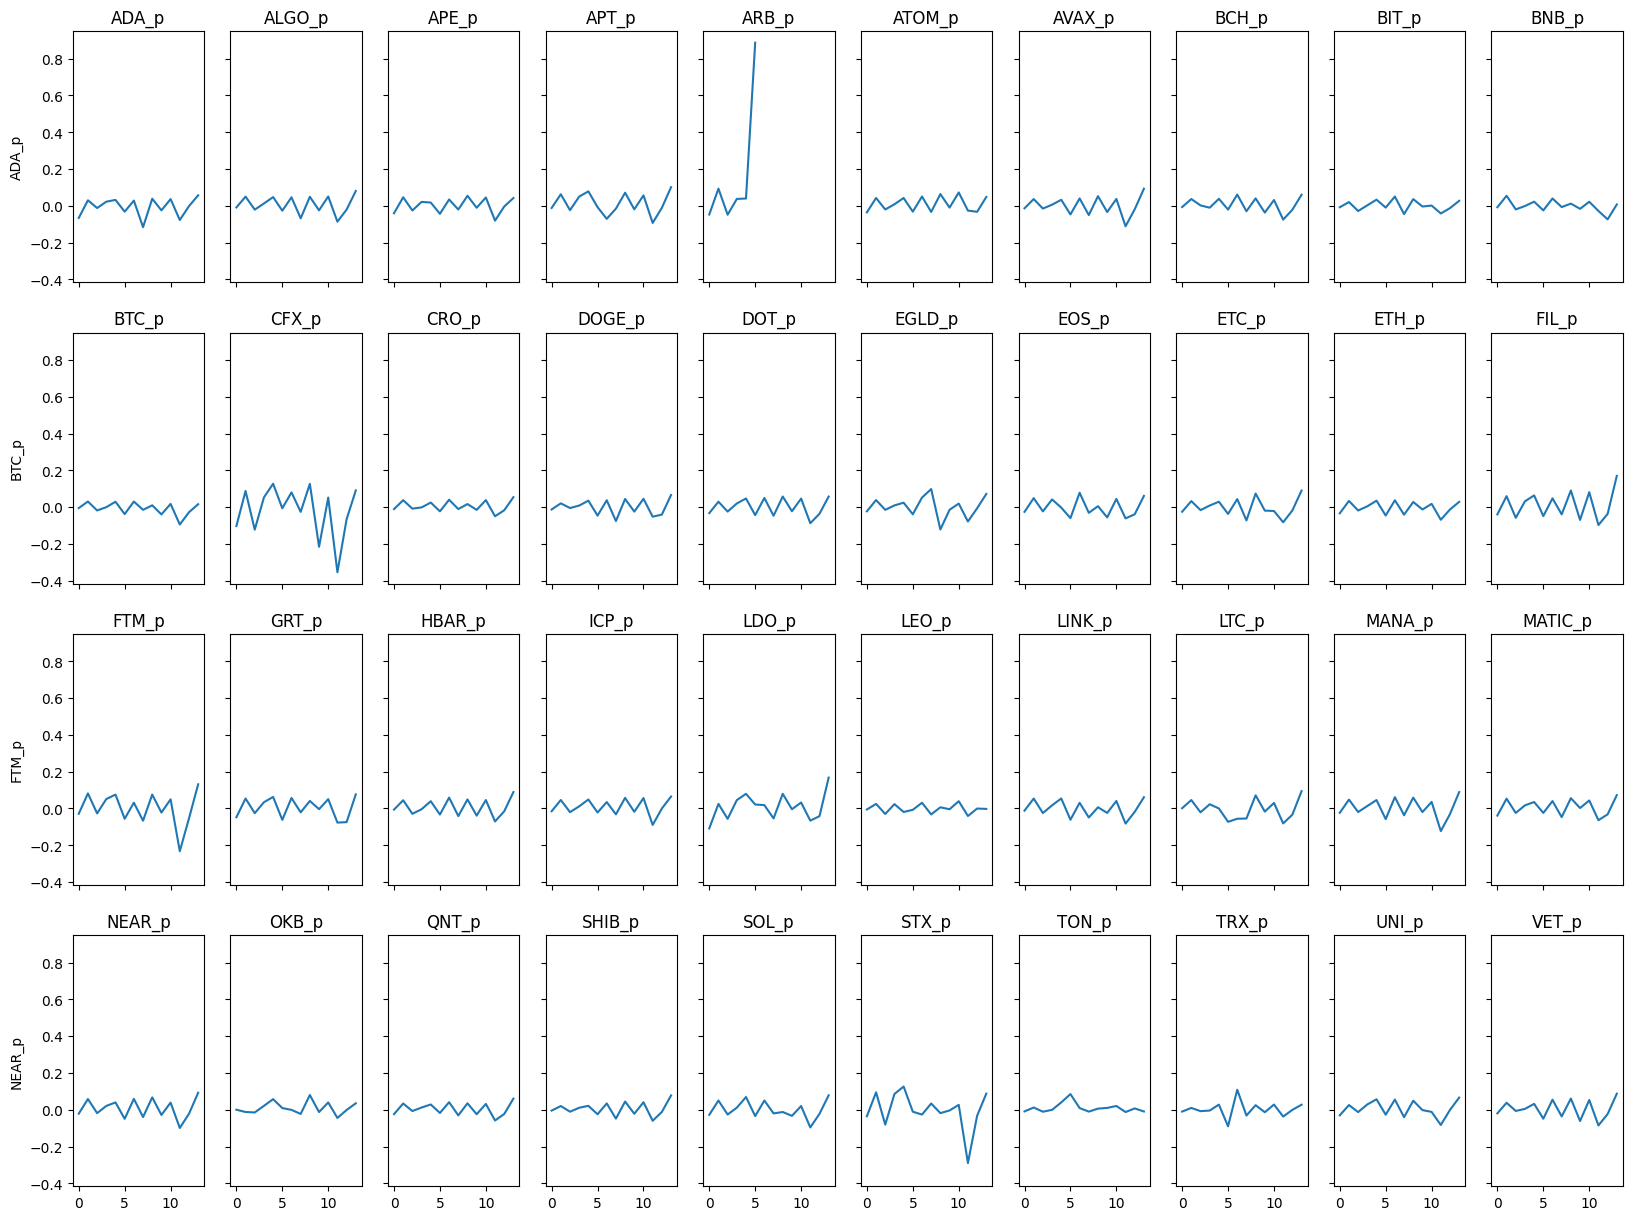

In [57]:
# Create Prices Charts for all Cryptocurrencies
list_length = X_df_filtered.shape[1]
ncols = 10
nrows = int(round(list_length / ncols, 0))
height = list_length/3 if list_length > 30 else 4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(20, height))
for i, ax in enumerate(fig.axes):
        if i < list_length:
            sns.lineplot(data=X_df_filtered, x=X_df_filtered.index, y=X_df_filtered.iloc[:, i], ax=ax)
            ax.set_title(X_df_filtered.columns[i])
plt.show()

# Step #3 Clustering Cryptocurrencies using Affinity Propagation

In [58]:
# Drop NaN values
X_df = pd.DataFrame(np.array(X_df_filtered)).dropna()

# Transpose the data to structure prices along columns
X = X_df.copy()
X /= X.std(axis=0)
X = np.array(X)

# Define an edge model based on covariance
edge_model = covariance.GraphicalLassoCV()

# Standardize the time series
edge_model.fit(X)

# Group cryptos to clusters using affinity propagation
# The number of clusters will be determined by the algorithm
cluster_centers_indices , labels = cluster.affinity_propagation(edge_model.covariance_, random_state=1)
cluster_dict = {}
n_labels = labels.max()
print(f"{n_labels} Clusters")
for i in range(n_labels + 1):
    clusters = ', '.join(names[labels == i])
    print('Cluster %i: %s' % ((i + 1), clusters))
    cluster_dict[i] = (clusters)

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_graph_lasso.py:291: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_graph_lasso.py:292: RuntimeWarning:

invalid value encountered in multiply

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to r

10 Clusters
Cluster 1: Aptos, BitDAO, Conflux, Filecoin, Stacks, Uniswap
Cluster 2: Arbitrum, Toncoin
Cluster 3: Avalanche, Bitcoin, Dogecoin, Chainlink, Decentraland, Shiba Inu, TRON, VeChain, Wrapped Bitcoin, Tezos
Cluster 4: Bitcoin Cash, BNB, Cronos, Hedera
Cluster 5: Cardano, Algorand, ApeCoin, Cosmos, Polkadot, MultiversX, Ethereum Classic, Ethereum, Fantom, The Graph, Internet Computer, Polygon, NEAR Protocol, Quant, Solana
Cluster 6: Lido DAO
Cluster 7: UNUS SED LEO
Cluster 8: EOS, Litecoin, Monero
Cluster 9: OKB
Cluster 10: Stellar
Cluster 11: XRP


c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning:

Only one sample available. You may want to reshape your data array

c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning:

invalid value encountered in subtract



# Step #4 Create a 2D Positioning Model based on  he Graph Structure

In [59]:
# Create a node_position_model that find the best position of the cryptos on a 2D plane
# The number of components defines the dimensions in which the nodes will be positioned
node_position_model = manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

# The result are x and y coordindates for all cryptocurrencies
pd.DataFrame(embedding)

# Create an edge_model that represents the partial correlations between the nodes
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]

# Only consider partial correlations above a specific threshold (0.02)
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Convert the Positioning Model into a DataFrame
data = pd.DataFrame.from_dict({"embedding_x":embedding[0],"embedding_y":embedding[1]})

# Add the labels to the 2D positioning model
data["labels"] = labels
print(data.shape)
data.head()

(45, 3)


,embedding_x,embedding_y,labels
0,-0.307738,-0.029808,4
1,0.153469,0.091993,4
2,-0.188539,-0.030576,4
3,0.181256,0.296532,0
4,-0.225345,0.362761,1


# Step #5 Vizualize the Crypto Market Structure

(45, 3)


<AxesSubplot: ylabel='Count'>

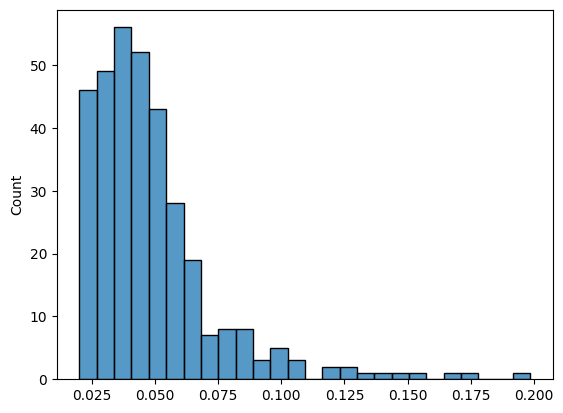

In [60]:
# Create a node_position_model that find the best position of the cryptos on a 2D plane
# The number of components defines the dimensions in which the nodes will be positioned
node_position_model = manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

# The result are x and y coordindates for all cryptocurrencies
pd.DataFrame(embedding)

# Create an edge_model that represents the partial correlations between the nodes
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]

# Only consider partial correlations above a specific threshold (0.02)
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Convert the Positioning Model into a DataFrame
data = pd.DataFrame.from_dict({"embedding_x":embedding[0],"embedding_y":embedding[1]})

# Add the labels to the 2D positioning model
data["labels"] = labels
print(data.shape)
data.head()

# Create an array with the segments for connecting the data points
start_idx, end_idx = np.where(non_zero) 
segments = [[np.array([embedding[:, start], embedding[:, stop]]).T, start, stop] for start, stop in zip(start_idx, end_idx)]

# Create a normalized representation of partial correlation between crypto currencies. 
# We can later use covariance to vizualize the strength of the connections
pc = np.abs(partial_correlations[non_zero])
normalized = (pc-min(pc))/(max(pc)-min(pc))

# plot the distribution of covariance between the cryptocurrencies
sns.histplot(pc)

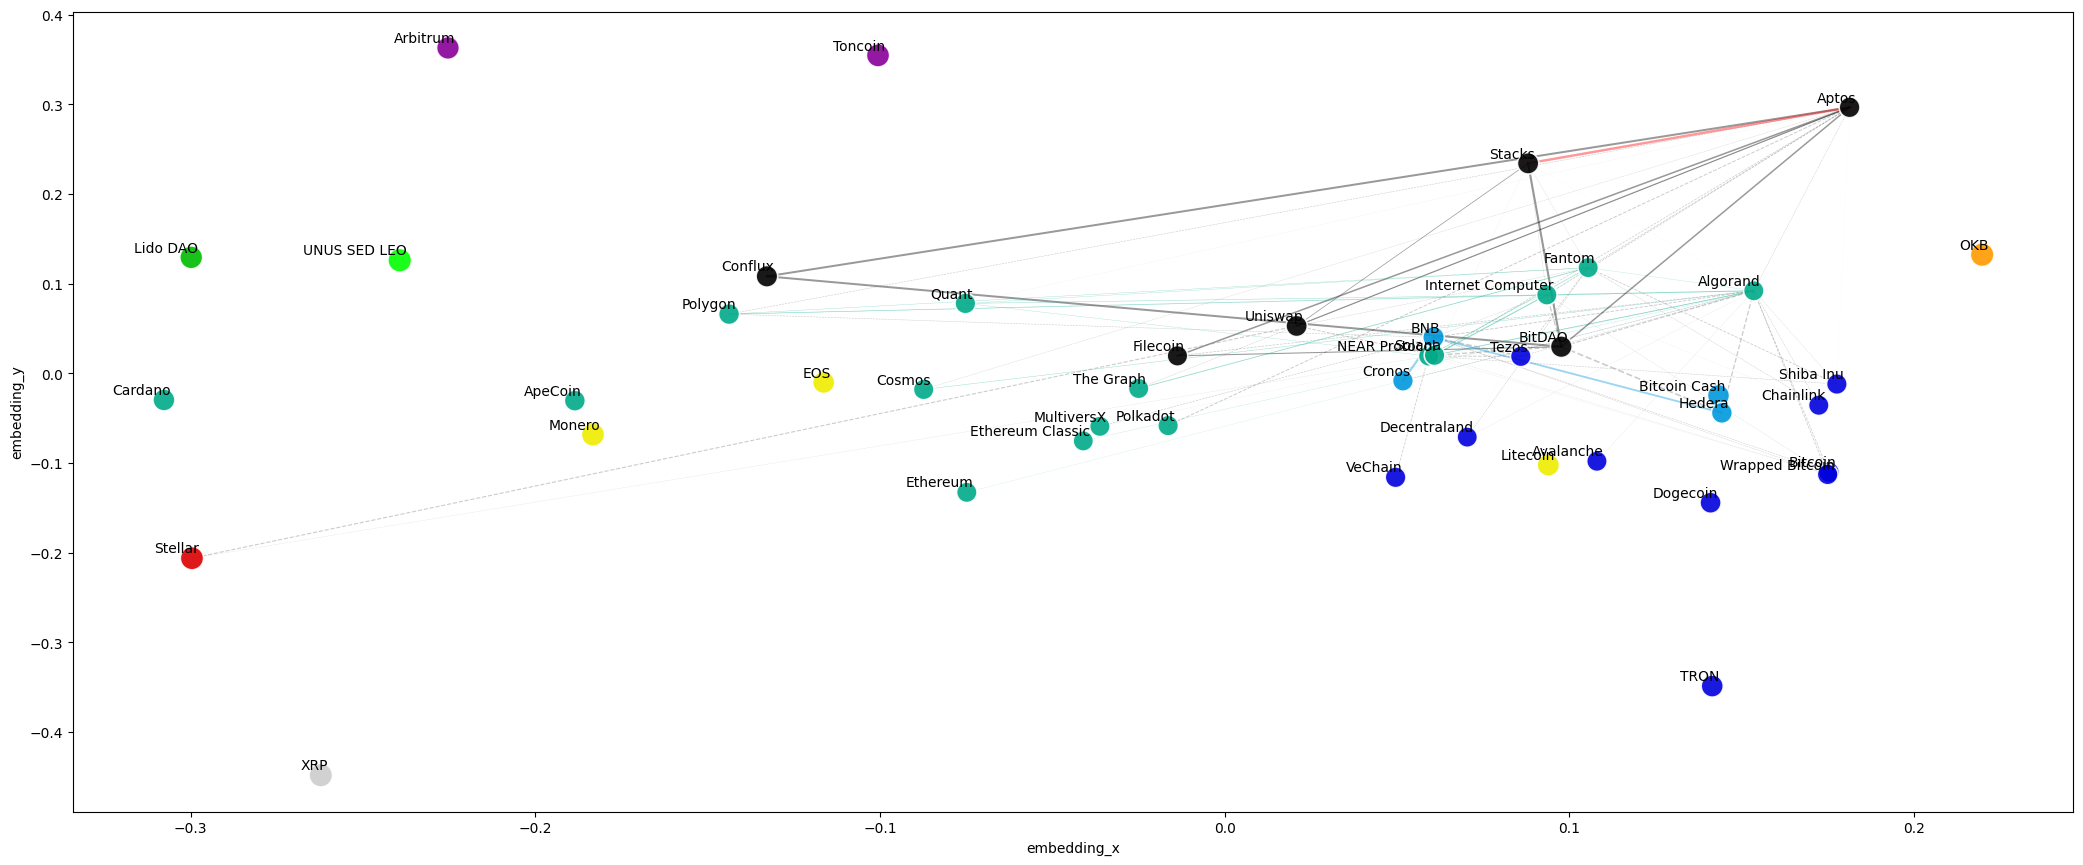

In [76]:
# Visualization
plt.figure(1, facecolor='w', figsize=(20, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])

# Plot the nodes using the coordinates of our embedding
sc = sns.scatterplot(
    data=data,
    x="embedding_x",
    y="embedding_y",
    zorder=1,
    s=350 * d ** 2,
    c=labels,
    cmap=plt.cm.nipy_spectral,
    alpha=.9,
    #palette="muted",
)

# Plot the covariance edges between the nodes (scatter points)
line_strength = 3.2
    
for index, ((x, y), start, stop) in enumerate(segments):     
    norm_partial_correlation = normalized[index]
    if list(data.iloc[[start]]['labels'])[0] == list(data.iloc[[stop]]['labels'])[0]:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle='solid'
        else:
            color = plt.cm.nipy_spectral(list(data.iloc[[start]]['labels'])[0] / float(n_labels)); linestyle='solid'
    else:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle='solid'
        else:
            color = 'grey'; linestyle='dashed'
    # Plot the edges
    # if x and y larger than 0
    if x[0] > 0 and y[0] > 0:
        plt.plot(x, y, alpha=.4, zorder=0, linewidth=normalized[index]*line_strength, color=color, linestyle=linestyle)

    
# Labels the nodes and position the labels to avoid overlap with other labels
for name, label, (x, y) in zip(names, labels, embedding.T):
    color = plt.cm.nipy_spectral(label / float(n_labels))
    ax.annotate(
        name,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom',
        fontsize=10,
        color='black',
        bbox=dict(facecolor='w', edgecolor="w", alpha=.0),
     )

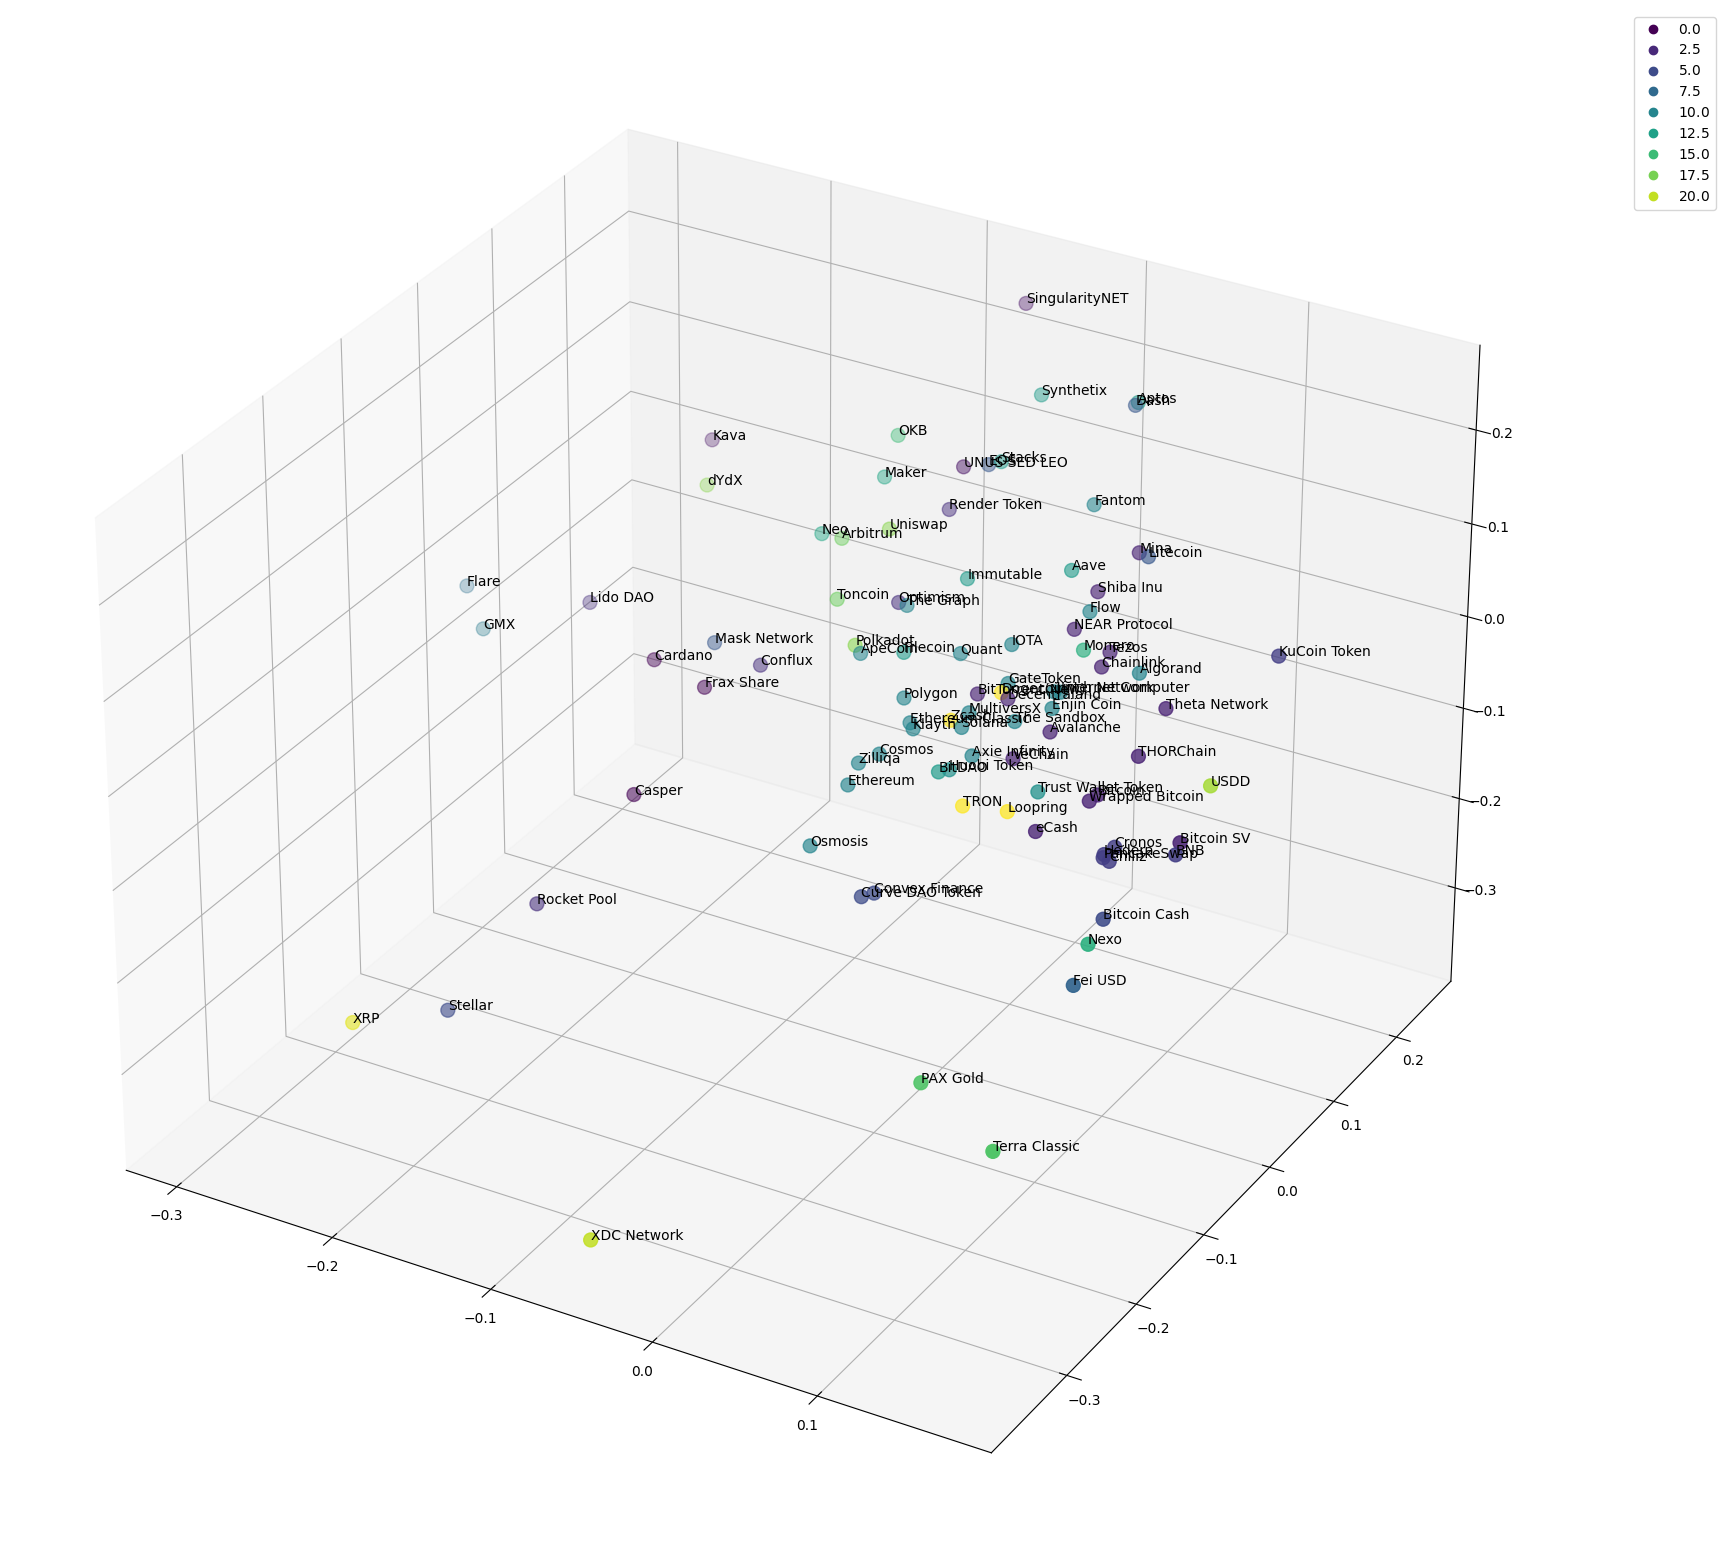

In [ ]:
# Find the best position of the cryptos on a 3D plane
node_position_model = manifold.LocallyLinearEmbedding(n_components=3, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

# The result are x and y coordindates for all cryptocurrencies
pd.DataFrame(embedding)

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

data = pd.DataFrame.from_dict({"embedding_x":embedding[0],"embedding_y":embedding[1],"embedding_z":embedding[1]})
data["labels"] = labels
data["names"] = names


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

xs = data["embedding_x"]
ys = data["embedding_y"]
zs = data["embedding_z"]
sc = ax.scatter(xs, ys, zs, c=labels, s=100)
    
for i in range(len(data)):
    x = xs[i]
    y = ys[i]
    z = zs[i]
    label = data["names"][i]
    ax.text(x, y, z, label)
    
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data, x = xs, y = ys, z = zs, color = labels, hover_name=names, width=800, height=400)
fig.show()